<a href="https://colab.research.google.com/github/fhzh123/CAU_mAI/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 및 자연어 처리를 위한 딥러닝 실습

## Recap: Convolutional Neural Networks

In [ ]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # CIFAR-10 크기 (32x32 입력 → 8x8 출력)
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN()

# 입력 예시 (Batch size: 4, 3채널, 32x32 이미지)
inputs = torch.rand(4, 3, 32, 32)

# 모델 실행 (순전파)
outputs = model(inputs)
print(outputs.shape)  # [4, 10]

torch.Size([4, 10])


## Recap: CNN Model Training

### 1. 라이브러리 임포트

In [ ]:
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

### 2. 데이터셋 로드 및 전처리

In [ ]:
# CIFAR-10 데이터셋 전처리 (이미지를 텐서로 변환하고 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화 (평균=0.5, 표준편차=0.5)
])

# 훈련 및 테스트 데이터셋 로드
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 클래스 이름 정의
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 43.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 3. 간단한 CNN 모델 정의

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 첫 번째 합성곱 층 (3채널 입력, 16채널 출력)
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 맥스 풀링
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 두 번째 합성곱 층
        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 완전 연결 층 (Flatten 후)
        self.fc2 = nn.Linear(64, 10)  # 최종 출력 층 (10개의 클래스)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN().cuda()

### 4. 손실 함수 및 옵티마이저 저의

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD 옵티마이저

### 5. 모델 학습

In [ ]:
for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 300 == 299:  # 매 300 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 300, Loss: 6.836
Epoch 1, Batch 600, Loss: 6.377
Epoch 1, Batch 900, Loss: 5.807
Epoch 1, Batch 1200, Loss: 5.541
Epoch 1, Batch 1500, Loss: 5.339
Epoch 2, Batch 300, Loss: 5.031
Epoch 2, Batch 600, Loss: 4.808
Epoch 2, Batch 900, Loss: 4.673
Epoch 2, Batch 1200, Loss: 4.497
Epoch 2, Batch 1500, Loss: 4.427
Epoch 3, Batch 300, Loss: 4.325
Epoch 3, Batch 600, Loss: 4.235
Epoch 3, Batch 900, Loss: 4.182
Epoch 3, Batch 1200, Loss: 4.140
Epoch 3, Batch 1500, Loss: 4.013
Epoch 4, Batch 300, Loss: 3.952
Epoch 4, Batch 600, Loss: 3.892
Epoch 4, Batch 900, Loss: 3.898
Epoch 4, Batch 1200, Loss: 3.847
Epoch 4, Batch 1500, Loss: 3.752
Epoch 5, Batch 300, Loss: 3.691
Epoch 5, Batch 600, Loss: 3.609
Epoch 5, Batch 900, Loss: 3.624
Epoch 5, Batch 1200, Loss: 3.602
Epoch 5, Batch 1500, Loss: 3.583
Finished Training


### 6. 테스트 데이터셋 평가

In [ ]:
correct = 0
total = 0

# 평가 모드 전환 (Gradient 비활성화)
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

Accuracy on the test dataset: 55.90%


#### 정성평가

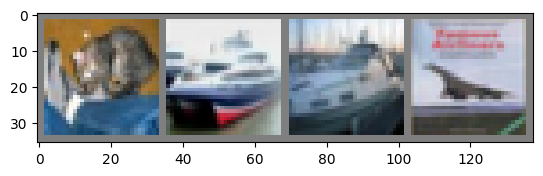

GroundTruth:  cat ship ship plane
Predicted:  cat car plane ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# CPU로 모델 내림
model.to("cpu")

# 이미지 출력 함수 정의
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


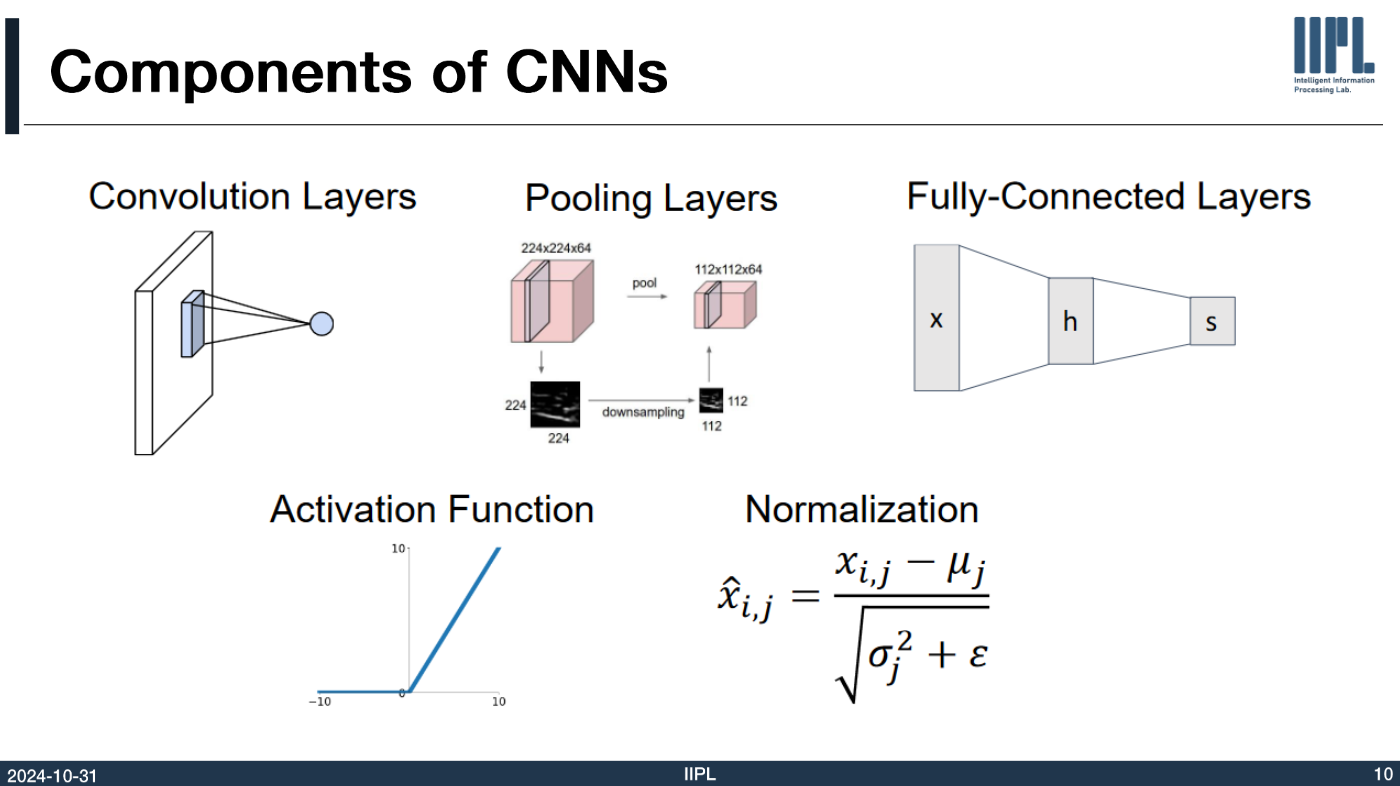

## Normalization

* Normalization(정규화)은 데이터 분석, 기계 학습, 데이터베이스와 같은 다양한 분야에서 값의 스케일을 조정하여 일관성 있게 만드는 여러 가지 기법을 의미합니다.

* Machine Learning 모델은 데이터가 가진 Feature을 뽑아서 학습하게 되는데, 이 때 데이터의 크기가 일정하지 않을 경우 모델이 데이터 간 편차가 큰 Feature 위주로 학습이 진행되기 때문에 모델이 데이터를 제대로 학습하지 못할 가능성이 있습니다.

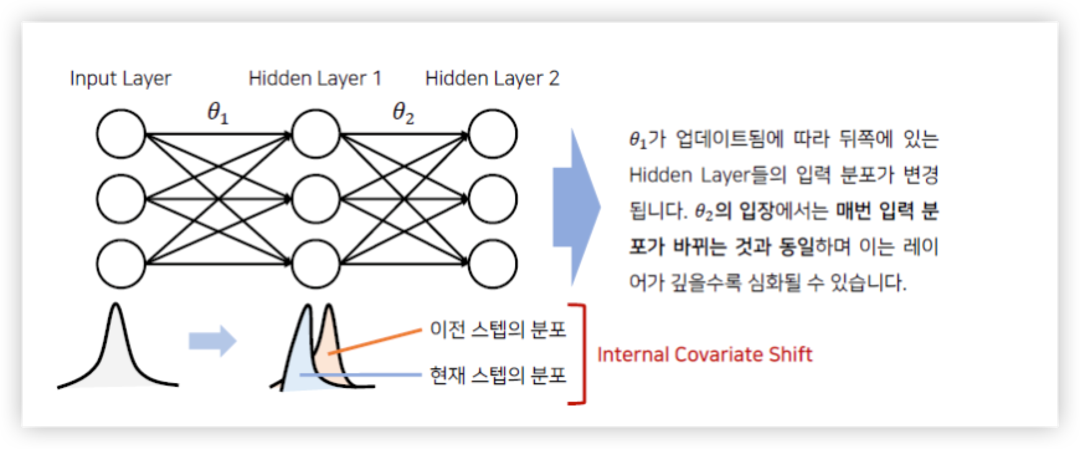

### Batch Normalization

* Batch Normalization은 hidden layer의 입력 값에 대한 scaling입니다.
* Batch Normalization은 별도의 과정으로 있는 것이 아닌, 신경망 안에 포함되어 학습 시 평균과 분산으로 조정하는 과정입니다.
* 주로 Fully-connected 혹은 Convolutional 레이어 뒤나 Activation function 앞에 BN을 넣어서 사용합니다.

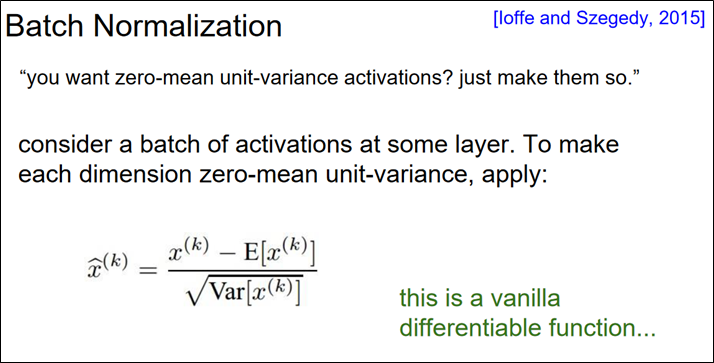

In [ ]:
import torch
import torch.nn as nn

class SimpleCNN_with_BN(nn.Module):
    def __init__(self):
        super(SimpleCNN_with_BN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 첫 번째 합성곱 층 (3채널 입력, 16채널 출력)
        self.bn1 = nn.BatchNorm2d(16)  # 첫 번째 Batch Normalization
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 맥스 풀링

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 두 번째 합성곱 층
        self.bn2 = nn.BatchNorm2d(32)  # 두 번째 Batch Normalization

        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 완전 연결 층 (Flatten 후)
        self.bn3 = nn.BatchNorm1d(64)  # 완전 연결 층의 Batch Normalization

        self.fc2 = nn.Linear(64, 10)  # 최종 출력 층 (10개의 클래스)

    def forward(self, x):
        # Conv1 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))

        # Conv2 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))

        # Flatten
        x = x.view(-1, 32 * 8 * 8)

        # FC1 -> BatchNorm -> ReLU
        x = torch.relu(self.bn3(self.fc1(x)))

        # Final Layer
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN_with_BN().cuda()

# 모델 요약 출력
print(model)

SimpleCNN_with_BN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


### Batch Normalization이 들어간 모델 학습

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD 옵티마이저

for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 300 == 299:  # 매 300 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 300, Loss: 5.254
Epoch 1, Batch 600, Loss: 4.455
Epoch 1, Batch 900, Loss: 4.164
Epoch 1, Batch 1200, Loss: 3.855
Epoch 1, Batch 1500, Loss: 3.667
Epoch 2, Batch 300, Loss: 3.373
Epoch 2, Batch 600, Loss: 3.316
Epoch 2, Batch 900, Loss: 3.225
Epoch 2, Batch 1200, Loss: 3.152
Epoch 2, Batch 1500, Loss: 3.068
Epoch 3, Batch 300, Loss: 2.855
Epoch 3, Batch 600, Loss: 2.879
Epoch 3, Batch 900, Loss: 2.812
Epoch 3, Batch 1200, Loss: 2.778
Epoch 3, Batch 1500, Loss: 2.835
Epoch 4, Batch 300, Loss: 2.574
Epoch 4, Batch 600, Loss: 2.580
Epoch 4, Batch 900, Loss: 2.577
Epoch 4, Batch 1200, Loss: 2.669
Epoch 4, Batch 1500, Loss: 2.567
Epoch 5, Batch 300, Loss: 2.361
Epoch 5, Batch 600, Loss: 2.408
Epoch 5, Batch 900, Loss: 2.394
Epoch 5, Batch 1200, Loss: 2.381
Epoch 5, Batch 1500, Loss: 2.374
Finished Training


In [ ]:
correct = 0
total = 0

# 평가 모드 전환 (Gradient 비활성화)
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

Accuracy on the test dataset: 69.25%


### 다른 Normalization 기법도 활용해보기

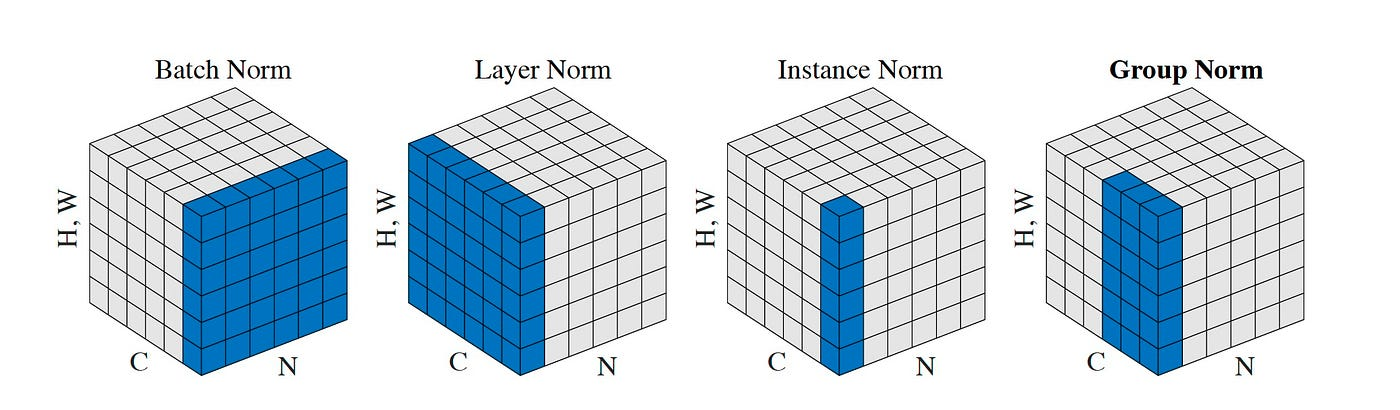

https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch
import torch.nn as nn

class SimpleCNN_with_GN(nn.Module):
    def __init__(self):
        super(SimpleCNN_with_GN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 첫 번째 합성곱 층
        self.gn1 = nn.GroupNorm(4, 16)  # 첫 번째 Group Normalization (4 그룹으로 나눔)
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 맥스 풀링

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 두 번째 합성곱 층
        self.gn2 = nn.GroupNorm(8, 32)  # 두 번째 Group Normalization (8 그룹으로 나눔)

        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 완전 연결 층
        self.gn3 = nn.GroupNorm(4, 64)  # 완전 연결 층의 Group Normalization (4 그룹으로 나눔)

        self.fc2 = nn.Linear(64, 10)  # 최종 출력 층 (10개의 클래스)

    def forward(self, x):
        # Conv1 -> GroupNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.gn1(self.conv1(x))))

        # Conv2 -> GroupNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.gn2(self.conv2(x))))

        # Flatten
        x = x.view(-1, 32 * 8 * 8)

        # FC1 -> GroupNorm -> ReLU
        x = torch.relu(self.gn3(self.fc1(x)))

        # Final Layer
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN_with_GN().cuda()

# 모델 요약 출력
print(model)

SimpleCNN_with_GN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn1): GroupNorm(4, 16, eps=1e-05, affine=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn2): GroupNorm(8, 32, eps=1e-05, affine=True)
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (gn3): GroupNorm(4, 64, eps=1e-05, affine=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD 옵티마이저

for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 300 == 299:  # 매 300 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 300, Loss: 5.656
Epoch 1, Batch 600, Loss: 4.648
Epoch 1, Batch 900, Loss: 4.328
Epoch 1, Batch 1200, Loss: 4.109
Epoch 1, Batch 1500, Loss: 3.897
Epoch 2, Batch 300, Loss: 3.637
Epoch 2, Batch 600, Loss: 3.568
Epoch 2, Batch 900, Loss: 3.486
Epoch 2, Batch 1200, Loss: 3.398
Epoch 2, Batch 1500, Loss: 3.334
Epoch 3, Batch 300, Loss: 3.165
Epoch 3, Batch 600, Loss: 3.062
Epoch 3, Batch 900, Loss: 3.035
Epoch 3, Batch 1200, Loss: 3.044
Epoch 3, Batch 1500, Loss: 2.976
Epoch 4, Batch 300, Loss: 2.784
Epoch 4, Batch 600, Loss: 2.771
Epoch 4, Batch 900, Loss: 2.800
Epoch 4, Batch 1200, Loss: 2.789
Epoch 4, Batch 1500, Loss: 2.685
Epoch 5, Batch 300, Loss: 2.564
Epoch 5, Batch 600, Loss: 2.556
Epoch 5, Batch 900, Loss: 2.569
Epoch 5, Batch 1200, Loss: 2.587
Epoch 5, Batch 1500, Loss: 2.523
Finished Training


## AlexNet 구현

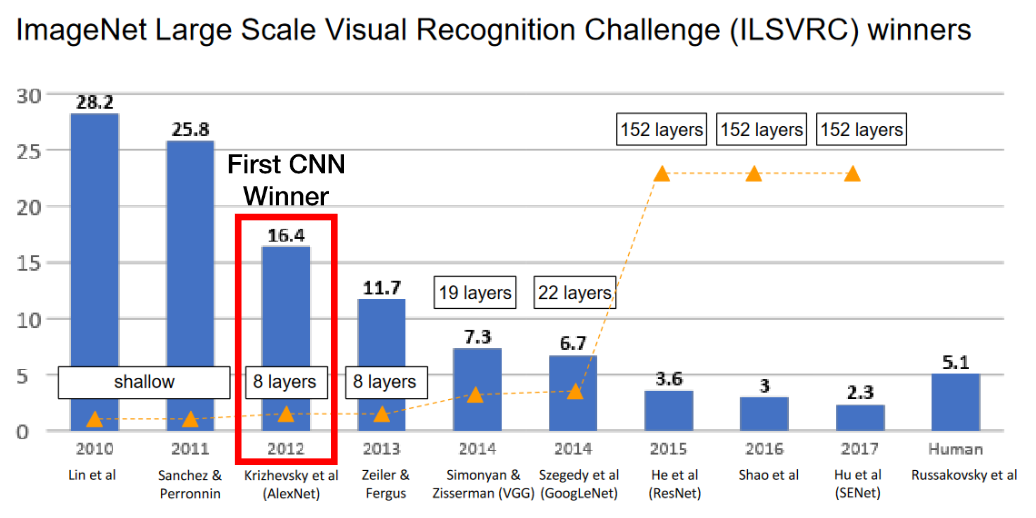

* AlexNet은 2012년 ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 대회에서 압도적인 성능을 보여주며 컴퓨터 비전 분야에 지대한 영향을 미친 합성곱 신경망(Convolutional Neural Network, CNN) 모델입니다.

* Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton 등이 개발한 AlexNet 논문은 딥러닝 분야에서 매우 중요한 역할을 했습니다. 이전까지는 컴퓨터 비전 문제에서 전통적인 기계학습 알고리즘이 주로 사용되었지만, AlexNet의 등장으로 딥러닝 기반 모델의 성능이 크게 향상되었습니다.

* 2012년 ILSVRC 대회에서는 단일 AlexNet 모델로도 18.2%의 낮은 오차율을 보였습니다. 결국 7개의 앙상블 AlexNet 모델로는 15.4%의 최고 성적을 거두며 우승을 차지했습니다. 이는 다음 순위 모델(26.2 %) 대비 10% 이상 성능이 향상한 결과였으며, 컴퓨터 비전 분야에 지각 변동을 일으킨 사건이었습니다.

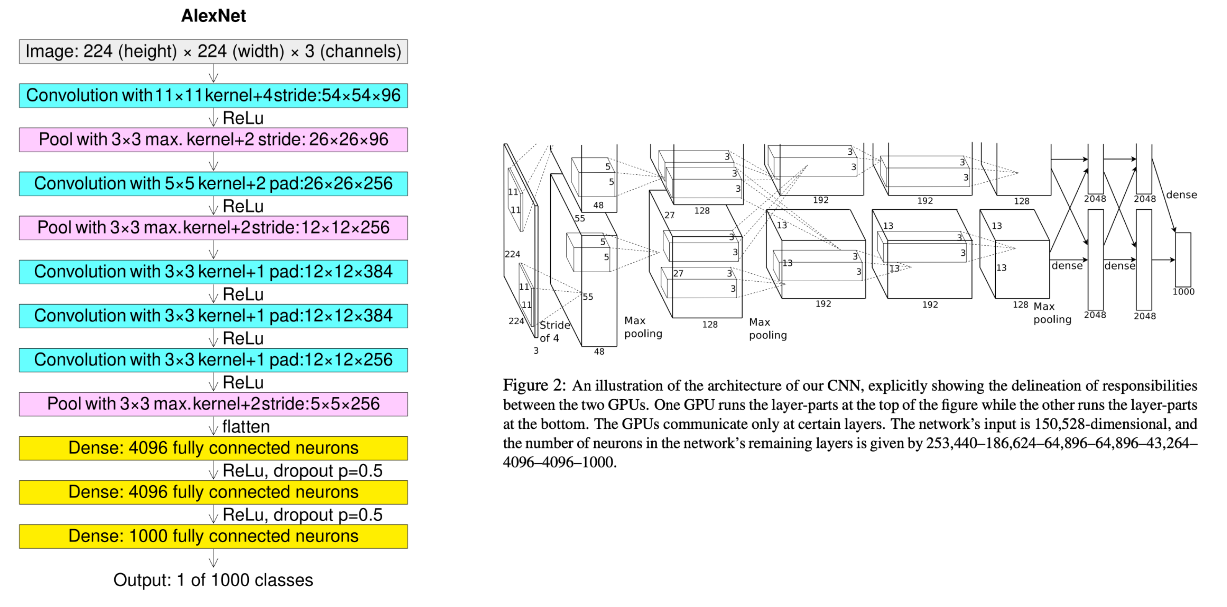

#### nn.Sequential

In [ ]:
seq_model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )
print(seq_model)

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)


In [ ]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))
print(seq_model)

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)


### Imagenette Dataset

* Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).
=> Imagenette는 Imagenet의 10개 클래스 데이터만
가져온 subset 데이터입니다.
* ImageNet데이터셋 전체를 활용하여 새로운 아이디어/알고리즘/실험 등을 실행하는 것은 많은 시간을 필요로 하기 때문에 연구자/실무자를 위해 ImageNet데이터의 작은 버전이 탄생하게 되었습니다.

* Train데이터 약 9,500개 Test데이터 약 3,900개로 구성되어 있습니다

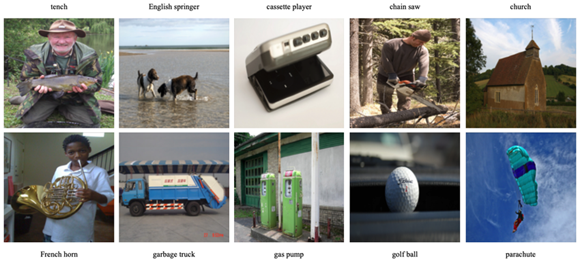

In [ ]:
import torchvision
from torchvision import datasets, transforms

# ImageNette 데이터셋 로드

# 데이터셋 전처리 (이미지를 텐서로 변환하고 정규화)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화 (평균=0.5, 표준편차=0.5)
])

# 훈련 및 테스트 데이터셋 로드
trainset = torchvision.datasets.Imagenette(
    root='./data', split='train', download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.Imagenette(
    root='./data', split='val', download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

이 외에도 다양한 데이터셋을 torchvision은 제공하고 있습니다.

https://pytorch.org/vision/main/datasets.html

### AlexNet

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),

            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),

            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_layers(x)
        return x

# 모델 인스턴스 생성
model = AlexNet(num_classes=10)
model.cuda()

# 모델 요약 출력
print(model)

AlexNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bi

### AlexNet 학습

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-8, weight_decay=1e-6)

for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 50 == 49:  # 매 50 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 50, Loss: 1.173
Epoch 1, Batch 100, Loss: 1.104
Epoch 1, Batch 150, Loss: 1.071
Epoch 1, Batch 200, Loss: 1.053
Epoch 1, Batch 250, Loss: 1.041
Epoch 2, Batch 50, Loss: 1.024
Epoch 2, Batch 100, Loss: 1.016
Epoch 2, Batch 150, Loss: 1.008
Epoch 2, Batch 200, Loss: 0.980
Epoch 2, Batch 250, Loss: 0.980
Epoch 3, Batch 50, Loss: 0.957
Epoch 3, Batch 100, Loss: 0.952
Epoch 3, Batch 150, Loss: 0.946
Epoch 3, Batch 200, Loss: 0.931
Epoch 3, Batch 250, Loss: 0.962
Epoch 4, Batch 50, Loss: 0.891
Epoch 4, Batch 100, Loss: 0.896
Epoch 4, Batch 150, Loss: 0.914
Epoch 4, Batch 200, Loss: 0.898
Epoch 4, Batch 250, Loss: 0.899
Epoch 5, Batch 50, Loss: 0.873
Epoch 5, Batch 100, Loss: 0.859
Epoch 5, Batch 150, Loss: 0.883
Epoch 5, Batch 200, Loss: 0.851
Epoch 5, Batch 250, Loss: 0.860
Finished Training


### AlexNet 성능 확인

In [ ]:
correct = 0
total = 0

# 평가 모드 전환 (Gradient 비활성화)
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

Accuracy on the test dataset: 40.23%


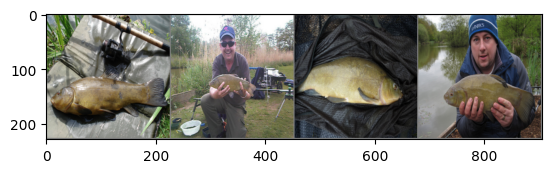

GroundTruth:  tench tench tench tench
Predicted:  garbage truck tench tench tench


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class Name
classes = ('tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute')

# CPU로 모델 내림
model.to("cpu")

# 이미지 출력 함수 정의
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


## VGG Net

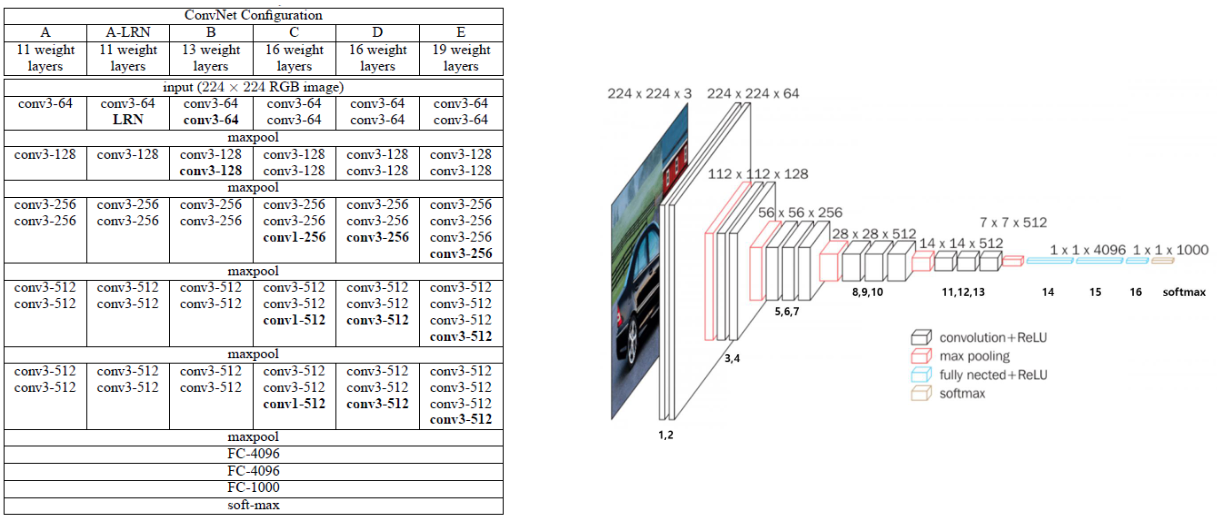

* VGG 연구팀은 딥러닝 모델의 깊이의 영향을 확인하기 위해서 convolution filter kernel 크기를 3x3으로 고정했습니다. 왜냐하면 filter kernel의 크기가 클 경우 이미지의 크기가 그만큼 빠르게 축소되기 때문입니다.
* 이러한 방식을 활용하면 두가지 장점을 얻을 수 있습니다.
    * 동일한 receptive field내에서 파라미터의 수를 줄일 수 있습니다.
    * 더욱 깊은 층의 딥러닝 모델을 설계할 수 있습니다.

* 연구 결과 더욱 깊은 층의 딥러닝 모델이 더 뛰어난 성능을 보이는 것을 확인했고, 해당 모델은 1등 모델 대비 훨씬 적은 수의 파라미터로도 1등 모델에 준하는 성능을 얻을 수 있었습니다.


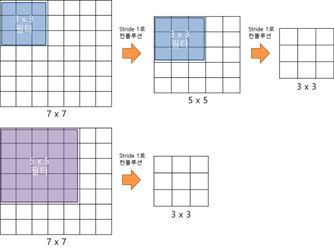

In [ ]:
import torch
import torch.nn as nn

class VGG(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG, self).__init__()

        # VGG-16 architecture: 13 conv layers and 3 fully connected layers
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Classifier (fully connected layers)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Model instantiation
num_classes = 10  # Number of output classes
model = VGG(num_classes=num_classes)
model.cuda()  # Move the model to the GPU if available

# Print the model architecture
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-8, weight_decay=1e-6)

for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 50 == 49:  # 매 50 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 50, Loss: 3.307
Epoch 1, Batch 100, Loss: 1.187
Epoch 1, Batch 150, Loss: 1.142
Epoch 1, Batch 200, Loss: 1.141
Epoch 1, Batch 250, Loss: 1.145
Epoch 2, Batch 50, Loss: 1.137
Epoch 2, Batch 100, Loss: 1.153
Epoch 2, Batch 150, Loss: 1.146
Epoch 2, Batch 200, Loss: 1.138
Epoch 2, Batch 250, Loss: 1.139
Epoch 3, Batch 50, Loss: 1.135
Epoch 3, Batch 100, Loss: 1.130
Epoch 3, Batch 150, Loss: 1.125
Epoch 3, Batch 200, Loss: 1.121
Epoch 3, Batch 250, Loss: 1.145
Epoch 4, Batch 50, Loss: 1.125
Epoch 4, Batch 100, Loss: 1.114
Epoch 4, Batch 150, Loss: 1.110
Epoch 4, Batch 200, Loss: 1.119
Epoch 4, Batch 250, Loss: 1.131
Epoch 5, Batch 50, Loss: 1.101
Epoch 5, Batch 100, Loss: 1.113
Epoch 5, Batch 150, Loss: 1.107
Epoch 5, Batch 200, Loss: 1.127
Epoch 5, Batch 250, Loss: 1.113
Finished Training


### nn.ModuleList

Holds submodules in a list.

* ModuleList는 일반 Python List처럼 인덱싱 할 수 있는 모듈의 리스트를 제공하는 함수입니다.
    * 즉 Python의 List처럼 Module들의 List를 활용하기 위한 함수입니다.
* 우선, nn.ModuleList는 nn.Sequential과 마찬가지로 nn.Module의 list를 input으로 받습니다.
* 두 종류의 module이 받는 input이 서로 다르고, 여러 개를 반복적으로 정의해야 할 때 유용합니다.


In [ ]:
class MyModule(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

In [ ]:
import torch
import torch.nn as nn

class VGG(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG, self).__init__()

        # Define the architecture in terms of number of filters per layer
        layers_config = [
            # Block 1
            [64, 64, 'M'],
            # Block 2
            [128, 128, 'M'],
            # Block 3
            [256, 256, 256, 'M'],
            # Block 4
            [512, 512, 512, 'M'],
            # Block 5
            [512, 512, 512, 'M'],
        ]

        # Features (convolutional layers) defined using ModuleList
        self.features = nn.ModuleList()
        in_channels = 3  # RGB input channels

        for block in layers_config:
            for layer in block:
                if layer == 'M':
                    self.features.append(nn.MaxPool2d(kernel_size=2, stride=2))
                else:
                    self.features.append(nn.Conv2d(in_channels, layer, kernel_size=3, padding=1))
                    self.features.append(nn.ReLU(inplace=True))
                    in_channels = layer

        # Classifier (fully connected layers)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        for layer in self.features:
            x = layer(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Model instantiation
num_classes = 10
model = VGG(num_classes=num_classes)

# Print the model architecture
print(model)

VGG(
  (features): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## ResNet

### Residual Block

* Gradient vanishing 및 exploding을 방지하기 위해 skip/shortcut connection을 활용합니다.
    * 입력 x를 몇 layer 이후의 출력값에 더해주는 방식입니다.
    * 기존의 신경망을 입력 x를 타겟 y로 매핑하는 함수 H(x)를 얻는 것을 목적으로 하지만, ResNet은 H(x)-x를 최소화하는 방식으로 학습을 진행하게 되며 해당 수식은 Gradient Vanishing을 완화시켜줄 수 있습니다.


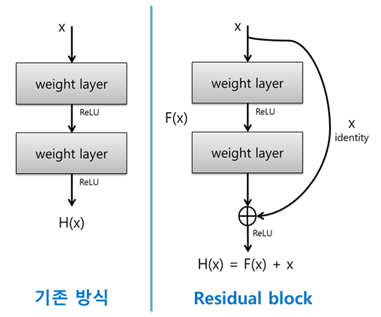

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# utils
import numpy as np
from torchsummary import summary

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        # BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정합니다.
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        # identity mapping, input과 output의 feature map size, filter 수가 동일한 경우 사용.
        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        # projection mapping using 1x1conv
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

In [ ]:
class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*BottleNeck.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*BottleNeck.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

### ResNet

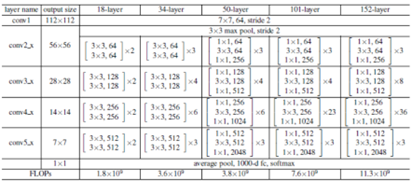

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=10, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])

def resnet101():
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet18().to(device)
x = torch.randn(3, 3, 224, 224).to(device)
output = model(x)
print(output.size())

torch.Size([3, 10])


In [ ]:
summary(model, (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

## Transfer Learning

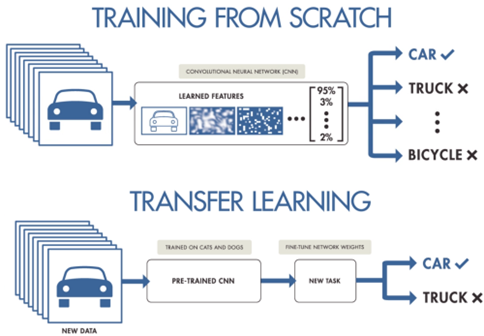

* Transfer Learning (사전적 정의):
한 분야의 문제를 해결하기 위해서 얻은 지식과 정보를 다른 문제를 푸는데 사용하는 방식
* 딥러닝의 분야에서는 특정 문제를 해결하는데 사용했던 네트워크(DNN;Deep Neural Network)를 다른 데이터셋 혹은 다른 문제(task)에 적용시켜 푸는 것을 의미합니다.

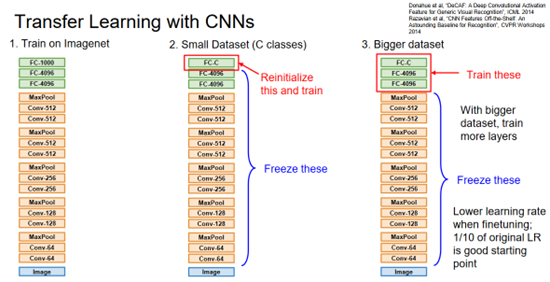

In [ ]:
from torchvision import models

model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.0MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

# Old weights with accuracy 76.130%
m1 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
m2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
m3 = resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
m4 = resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
m5 = resnet50(weights=None)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 126MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 161MB/s]


In [ ]:
import torchvision
from torchvision.models import list_models

# List available models
all_models = list_models()
classification_models = list_models(module=torchvision.models)

In [ ]:
classification_models

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'googlenet',
 'inception_v3',
 'maxvit_t',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext101_64x4d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'sh

In [ ]:
entrypoints = torch.hub.list("pytorch/vision", force_reload=True)
print(entrypoints)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip


['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'deeplabv3_mobilenet_v3_large', 'deeplabv3_resnet101', 'deeplabv3_resnet50', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'fcn_resnet101', 'fcn_resnet50', 'get_model_weights', 'get_weight', 'googlenet', 'inception_v3', 'lraspp_mobilenet_v3_large', 'maxvit_t', 'mc3_18', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'mvit_v1_b', 'mvit_v2_s', 'r2plus1d_18', 'r3d_18', 'raft_large', 'raft_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_40

In [ ]:
# from a github repo
repo = "pytorch/vision"
model = torch.hub.load(
    repo, "resnet50", weights="ResNet50_Weights.IMAGENET1K_V1"
)
print(model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 데이터 맞게 출력층 수정 (10개의 클래스)
model.fc = nn.Linear(model.fc.in_features, 10)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.cuda()

criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-8, weight_decay=1e-6)

for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 50 == 49:  # 매 50 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 50, Loss: 0.688
Epoch 1, Batch 100, Loss: 0.505
Epoch 1, Batch 150, Loss: 0.426
Epoch 1, Batch 200, Loss: 0.461
Epoch 1, Batch 250, Loss: 0.347
Epoch 2, Batch 50, Loss: 0.299
Epoch 2, Batch 100, Loss: 0.294
Epoch 2, Batch 150, Loss: 0.254
Epoch 2, Batch 200, Loss: 0.322
Epoch 2, Batch 250, Loss: 0.271
Epoch 3, Batch 50, Loss: 0.220
Epoch 3, Batch 100, Loss: 0.244
Epoch 3, Batch 150, Loss: 0.235
Epoch 3, Batch 200, Loss: 0.208
Epoch 3, Batch 250, Loss: 0.248
Epoch 4, Batch 50, Loss: 0.187
Epoch 4, Batch 100, Loss: 0.166
Epoch 4, Batch 150, Loss: 0.190
Epoch 4, Batch 200, Loss: 0.194
Epoch 4, Batch 250, Loss: 0.162
Epoch 5, Batch 50, Loss: 0.147
Epoch 5, Batch 100, Loss: 0.127
Epoch 5, Batch 150, Loss: 0.132
Epoch 5, Batch 200, Loss: 0.161
Epoch 5, Batch 250, Loss: 0.183
Finished Training


In [ ]:
correct = 0
total = 0

# 평가 모드 전환 (Gradient 비활성화)
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

Accuracy on the test dataset: 86.11%


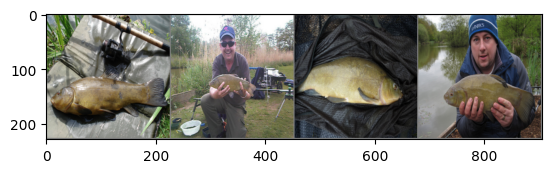

GroundTruth:  tench tench tench tench
Predicted:  tench tench tench tench


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# CPU로 모델 내림
model.to("cpu")

# 이미지 출력 함수 정의
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))